In [1]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-granularity.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccrandomringbw,3,16,4,4,2022-04-12T07:58:16Z,2022-04-12T07:58:20Z,2022-04-12T08:08:18Z,2022-04-12T08:08:18Z,10m40.900158824s,0.026888
1,hpccstream,3,16,4,16,2022-04-12T07:58:52Z,2022-04-12T07:59:01Z,2022-04-12T08:12:12Z,2022-04-12T08:12:13Z,14m5.439991453s,7.527660
2,nasep,1,16,4,16,2022-04-12T08:01:14Z,2022-04-12T08:01:23Z,2022-04-12T08:17:33Z,2022-04-12T08:17:33Z,17m8.864679689s,931.440000
3,hpccstream,0,16,4,16,2022-04-12T08:02:18Z,2022-04-12T08:02:27Z,2022-04-12T08:11:39Z,2022-04-12T08:11:40Z,9m59.571192227s,8.613220
4,hpccrandomringbw,2,16,4,4,2022-04-12T08:05:03Z,2022-04-12T08:08:59Z,2022-04-12T08:23:08Z,2022-04-12T08:23:09Z,18m44.065512271s,0.022898
5,hpccdgemm,0,16,4,16,2022-04-12T08:05:48Z,2022-04-12T08:12:25Z,2022-04-12T08:28:04Z,2022-04-12T08:28:05Z,22m58.945494204s,38.650400
6,hpccrandomringbw,0,16,4,4,2022-04-12T08:09:14Z,2022-04-12T08:13:00Z,2022-04-12T08:27:25Z,2022-04-12T08:27:25Z,18m52.907064913s,0.022921
7,nasep,2,16,4,16,2022-04-12T08:09:18Z,2022-04-12T08:18:24Z,2022-04-12T08:38:43Z,2022-04-12T08:38:43Z,30m8.956893148s,1181.200000
8,hpccfft,0,16,4,4,2022-04-12T08:09:49Z,2022-04-12T08:28:58Z,2022-04-12T08:35:46Z,2022-04-12T08:35:47Z,26m31.509517885s,1.262070
9,hpccdgemm,1,16,4,16,2022-04-12T08:10:15Z,2022-04-12T08:29:00Z,2022-04-12T08:43:45Z,2022-04-12T08:43:45Z,34m11.942407854s,41.240400


In [2]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [3]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [4]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccrandomringbw,3,16,4,4,2022-04-12 07:58:16+00:00,2022-04-12 07:58:20+00:00,2022-04-12 08:08:18+00:00,2022-04-12 08:08:18+00:00,0 days 00:10:40.900158824,0.026888,0 days 00:00:04,0 days 00:09:58,0 days 00:00:00
1,hpccstream,3,16,4,16,2022-04-12 07:58:52+00:00,2022-04-12 07:59:01+00:00,2022-04-12 08:12:12+00:00,2022-04-12 08:12:13+00:00,0 days 00:14:05.439991453,7.527660,0 days 00:00:09,0 days 00:13:11,0 days 00:00:01
2,nasep,1,16,4,16,2022-04-12 08:01:14+00:00,2022-04-12 08:01:23+00:00,2022-04-12 08:17:33+00:00,2022-04-12 08:17:33+00:00,0 days 00:17:08.864679689,931.440000,0 days 00:00:09,0 days 00:16:10,0 days 00:00:00
3,hpccstream,0,16,4,16,2022-04-12 08:02:18+00:00,2022-04-12 08:02:27+00:00,2022-04-12 08:11:39+00:00,2022-04-12 08:11:40+00:00,0 days 00:09:59.571192227,8.613220,0 days 00:00:09,0 days 00:09:12,0 days 00:00:01
4,hpccrandomringbw,2,16,4,4,2022-04-12 08:05:03+00:00,2022-04-12 08:08:59+00:00,2022-04-12 08:23:08+00:00,2022-04-12 08:23:09+00:00,0 days 00:18:44.065512271,0.022898,0 days 00:03:56,0 days 00:14:09,0 days 00:00:01
5,hpccdgemm,0,16,4,16,2022-04-12 08:05:48+00:00,2022-04-12 08:12:25+00:00,2022-04-12 08:28:04+00:00,2022-04-12 08:28:05+00:00,0 days 00:22:58.945494204,38.650400,0 days 00:06:37,0 days 00:15:39,0 days 00:00:01
6,hpccrandomringbw,0,16,4,4,2022-04-12 08:09:14+00:00,2022-04-12 08:13:00+00:00,2022-04-12 08:27:25+00:00,2022-04-12 08:27:25+00:00,0 days 00:18:52.907064913,0.022921,0 days 00:03:46,0 days 00:14:25,0 days 00:00:00
7,nasep,2,16,4,16,2022-04-12 08:09:18+00:00,2022-04-12 08:18:24+00:00,2022-04-12 08:38:43+00:00,2022-04-12 08:38:43+00:00,0 days 00:30:08.956893148,1181.200000,0 days 00:09:06,0 days 00:20:19,0 days 00:00:00
8,hpccfft,0,16,4,4,2022-04-12 08:09:49+00:00,2022-04-12 08:28:58+00:00,2022-04-12 08:35:46+00:00,2022-04-12 08:35:47+00:00,0 days 00:26:31.509517884,1.262070,0 days 00:19:09,0 days 00:06:48,0 days 00:00:01
9,hpccdgemm,1,16,4,16,2022-04-12 08:10:15+00:00,2022-04-12 08:29:00+00:00,2022-04-12 08:43:45+00:00,2022-04-12 08:43:45+00:00,0 days 00:34:11.942407854,41.240400,0 days 00:18:45,0 days 00:14:45,0 days 00:00:00


In [5]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [6]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccrandomringbw,3,16,4,4,2022-04-12 07:58:16+00:00,2022-04-12 07:58:20+00:00,2022-04-12 08:08:18+00:00,2022-04-12 08:08:18+00:00,0 days 00:10:40.900158824,0.026888,0 days 00:00:04,0 days 00:09:58,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:00:00
1,hpccstream,3,16,4,16,2022-04-12 07:58:52+00:00,2022-04-12 07:59:01+00:00,2022-04-12 08:12:12+00:00,2022-04-12 08:12:13+00:00,0 days 00:14:05.439991453,7.527660,0 days 00:00:09,0 days 00:13:11,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:00:36
2,nasep,1,16,4,16,2022-04-12 08:01:14+00:00,2022-04-12 08:01:23+00:00,2022-04-12 08:17:33+00:00,2022-04-12 08:17:33+00:00,0 days 00:17:08.864679689,931.440000,0 days 00:00:09,0 days 00:16:10,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:02:58
3,hpccstream,0,16,4,16,2022-04-12 08:02:18+00:00,2022-04-12 08:02:27+00:00,2022-04-12 08:11:39+00:00,2022-04-12 08:11:40+00:00,0 days 00:09:59.571192227,8.613220,0 days 00:00:09,0 days 00:09:12,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:04:02
4,hpccrandomringbw,2,16,4,4,2022-04-12 08:05:03+00:00,2022-04-12 08:08:59+00:00,2022-04-12 08:23:08+00:00,2022-04-12 08:23:09+00:00,0 days 00:18:44.065512271,0.022898,0 days 00:03:56,0 days 00:14:09,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:06:47
5,hpccdgemm,0,16,4,16,2022-04-12 08:05:48+00:00,2022-04-12 08:12:25+00:00,2022-04-12 08:28:04+00:00,2022-04-12 08:28:05+00:00,0 days 00:22:58.945494204,38.650400,0 days 00:06:37,0 days 00:15:39,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:07:32
6,hpccrandomringbw,0,16,4,4,2022-04-12 08:09:14+00:00,2022-04-12 08:13:00+00:00,2022-04-12 08:27:25+00:00,2022-04-12 08:27:25+00:00,0 days 00:18:52.907064913,0.022921,0 days 00:03:46,0 days 00:14:25,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:10:58
7,nasep,2,16,4,16,2022-04-12 08:09:18+00:00,2022-04-12 08:18:24+00:00,2022-04-12 08:38:43+00:00,2022-04-12 08:38:43+00:00,0 days 00:30:08.956893148,1181.200000,0 days 00:09:06,0 days 00:20:19,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:11:02
8,hpccfft,0,16,4,4,2022-04-12 08:09:49+00:00,2022-04-12 08:28:58+00:00,2022-04-12 08:35:46+00:00,2022-04-12 08:35:47+00:00,0 days 00:26:31.509517884,1.262070,0 days 00:19:09,0 days 00:06:48,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:11:33
9,hpccdgemm,1,16,4,16,2022-04-12 08:10:15+00:00,2022-04-12 08:29:00+00:00,2022-04-12 08:43:45+00:00,2022-04-12 08:43:45+00:00,0 days 00:34:11.942407854,41.240400,0 days 00:18:45,0 days 00:14:45,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:11:59


In [7]:
df['benchmark'].unique()

array(['hpccrandomringbw', 'hpccstream', 'nasep', 'hpccdgemm', 'hpccfft'],
      dtype=object)

In [8]:
df['nWorkers'].unique()

array([ 4, 16])

#  performance

In [9]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [10]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccrandomringbw,16,4,4,0.024235,0.001875
0,hpccstream,16,4,16,8.070440,0.542780
0,nasep,16,4,16,1056.320000,124.880000
0,hpccdgemm,16,4,16,39.945400,1.295000
0,hpccfft,16,4,4,1.262070,0.000000


          benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccrandomringbw      16       4         4         0.024235        0.001875
    benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccstream      16       4        16          8.07044         0.54278
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0     nasep      16       4        16          1056.32          124.88
   benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccdgemm      16       4        16          39.9454           1.295
  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4          1.26207             0.0


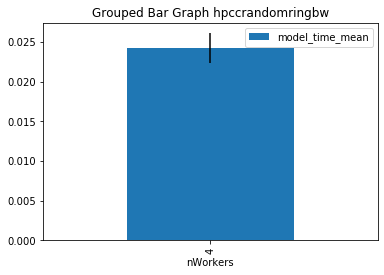

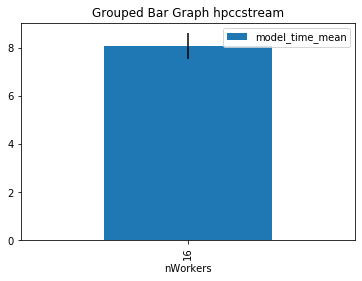

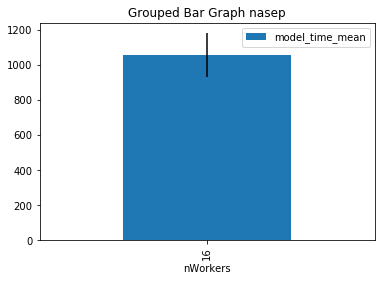

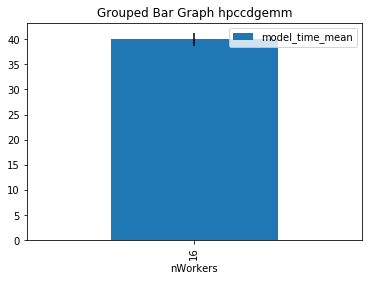

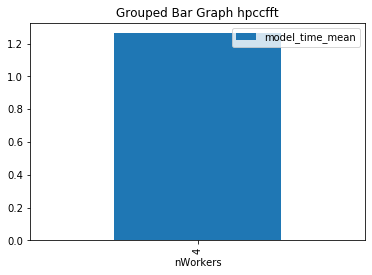

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [12]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [13]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccrandomringbw,16,4,4,0 days 00:02:35.333333333,0 days 00:01:47.086673099,0 days 00:12:50.666666666,0 days 00:02:02.268375124,0 days 00:00:00.333333333,0 days 00:00:00.471404520,0 days 00:16:05.957578669,0 days 00:03:49.878646116
0,hpccstream,16,4,16,0 days 00:00:09,0 days 00:00:00,0 days 00:11:11.500000,0 days 00:01:59.500000,0 days 00:00:01,0 days 00:00:00,0 days 00:12:02.505591840,0 days 00:02:02.934399613
0,nasep,16,4,16,0 days 00:04:37.500000,0 days 00:04:28.500000,0 days 00:18:14.500000,0 days 00:02:04.500000,0 days 00:00:00,0 days 00:00:00,0 days 00:23:38.910786418,0 days 00:06:30.046106729
0,hpccdgemm,16,4,16,0 days 00:12:41,0 days 00:06:04,0 days 00:15:12,0 days 00:00:27,0 days 00:00:00.500000,0 days 00:00:00.500000,0 days 00:28:35.443951029,0 days 00:05:36.498456825
0,hpccfft,16,4,4,0 days 00:19:09,0 days 00:00:00,0 days 00:06:48,0 days 00:00:00,0 days 00:00:01,0 days 00:00:00,0 days 00:26:31.509517884,0 days 00:00:00


<ipython-input-14-850cf490fa20>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-850cf490fa20>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



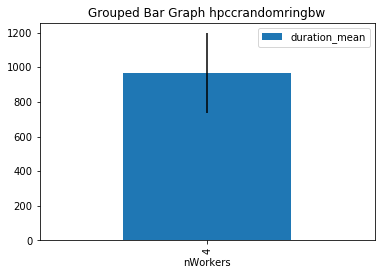

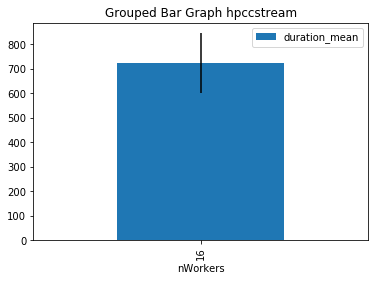

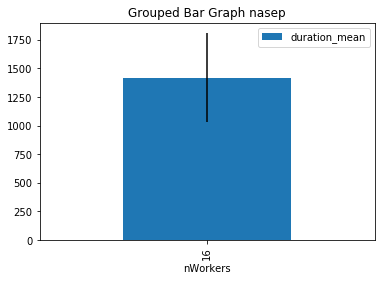

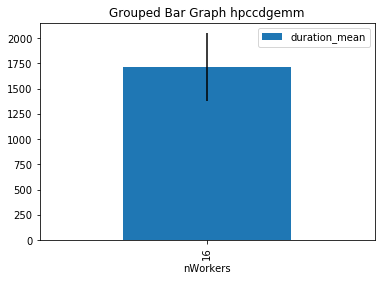

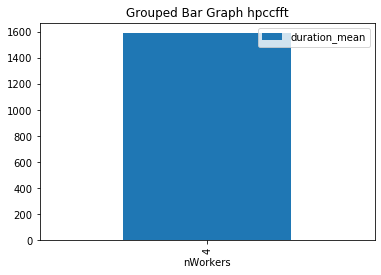

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [15]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [16]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccrandomringbw,16,466.0,2312.0,1.0,2897.872736
0,hpccstream,16,18.0,1343.0,2.0,1445.011184
0,nasep,16,555.0,2189.0,0.0,2837.821573
0,hpccdgemm,16,1522.0,1824.0,1.0,3430.887902
0,hpccfft,16,1149.0,408.0,1.0,1591.509518


<ipython-input-17-1521fc477d73>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



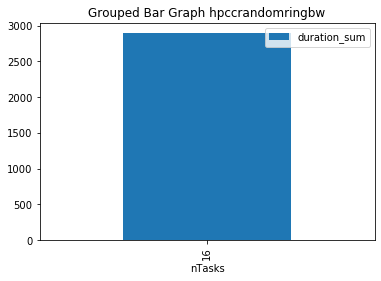

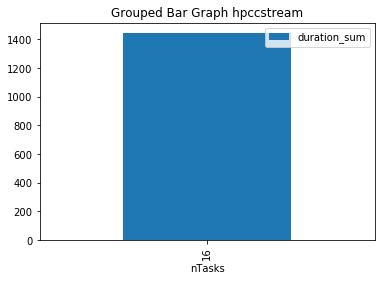

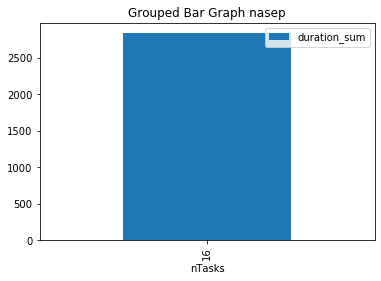

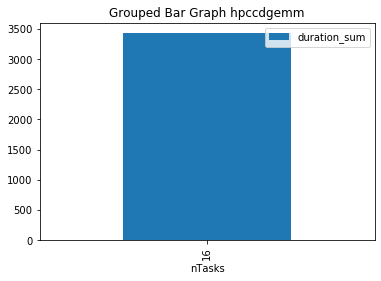

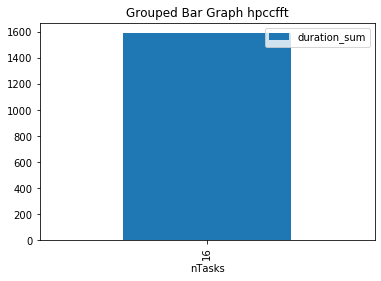

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [18]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccrandomringbw,3,16,4,4,2022-04-12 07:58:16+00:00,2022-04-12 07:58:20+00:00,2022-04-12 08:08:18+00:00,2022-04-12 08:08:18+00:00,0 days 00:10:40.900158824,0.026888,0 days 00:00:04,0 days 00:09:58,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:00:00
1,hpccstream,3,16,4,16,2022-04-12 07:58:52+00:00,2022-04-12 07:59:01+00:00,2022-04-12 08:12:12+00:00,2022-04-12 08:12:13+00:00,0 days 00:14:05.439991453,7.527660,0 days 00:00:09,0 days 00:13:11,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:00:36
2,nasep,1,16,4,16,2022-04-12 08:01:14+00:00,2022-04-12 08:01:23+00:00,2022-04-12 08:17:33+00:00,2022-04-12 08:17:33+00:00,0 days 00:17:08.864679689,931.440000,0 days 00:00:09,0 days 00:16:10,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:02:58
3,hpccstream,0,16,4,16,2022-04-12 08:02:18+00:00,2022-04-12 08:02:27+00:00,2022-04-12 08:11:39+00:00,2022-04-12 08:11:40+00:00,0 days 00:09:59.571192227,8.613220,0 days 00:00:09,0 days 00:09:12,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:04:02
4,hpccrandomringbw,2,16,4,4,2022-04-12 08:05:03+00:00,2022-04-12 08:08:59+00:00,2022-04-12 08:23:08+00:00,2022-04-12 08:23:09+00:00,0 days 00:18:44.065512271,0.022898,0 days 00:03:56,0 days 00:14:09,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:06:47
5,hpccdgemm,0,16,4,16,2022-04-12 08:05:48+00:00,2022-04-12 08:12:25+00:00,2022-04-12 08:28:04+00:00,2022-04-12 08:28:05+00:00,0 days 00:22:58.945494204,38.650400,0 days 00:06:37,0 days 00:15:39,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:07:32
6,hpccrandomringbw,0,16,4,4,2022-04-12 08:09:14+00:00,2022-04-12 08:13:00+00:00,2022-04-12 08:27:25+00:00,2022-04-12 08:27:25+00:00,0 days 00:18:52.907064913,0.022921,0 days 00:03:46,0 days 00:14:25,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:10:58
7,nasep,2,16,4,16,2022-04-12 08:09:18+00:00,2022-04-12 08:18:24+00:00,2022-04-12 08:38:43+00:00,2022-04-12 08:38:43+00:00,0 days 00:30:08.956893148,1181.200000,0 days 00:09:06,0 days 00:20:19,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:11:02
8,hpccfft,0,16,4,4,2022-04-12 08:09:49+00:00,2022-04-12 08:28:58+00:00,2022-04-12 08:35:46+00:00,2022-04-12 08:35:47+00:00,0 days 00:26:31.509517884,1.262070,0 days 00:19:09,0 days 00:06:48,0 days 00:00:01,2022-04-12 07:58:16+00:00,0 days 00:11:33
9,hpccdgemm,1,16,4,16,2022-04-12 08:10:15+00:00,2022-04-12 08:29:00+00:00,2022-04-12 08:43:45+00:00,2022-04-12 08:43:45+00:00,0 days 00:34:11.942407854,41.240400,0 days 00:18:45,0 days 00:14:45,0 days 00:00:00,2022-04-12 07:58:16+00:00,0 days 00:11:59


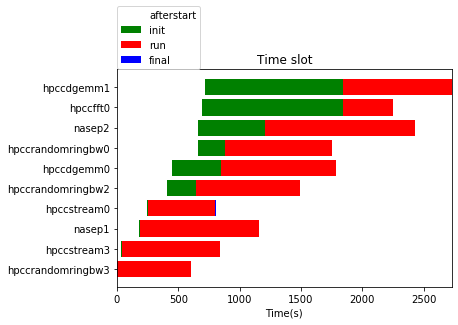

In [19]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
